<h1 align=center><font size = 5>DEPARTEMEN HUMAN RESOURCE</font></h1>

***Notebook CP-4***



> ### **Understanding Business Problem**

> * Pada perusahaan ini, ingin memaksimalkan kinerja dari masing masing departemen dimasa mendatang. Tujuannya untuk melakukan perbaikan dalam meningkatkan keterlibatan, produktivitas karyawan dan mengurangi gesekan yang tidak diinginkan.   


>* **Problem:** 
    * Tim HR Kesulitan Menentukan Absennt terhadap pekerjanya
>* **Object:** 
    * Predict Absennt pekerja
>* **Succes Matric:** 
    * Tingkat Asumsi sesui dengan rata2 59.95 hours 
>* **Requirement:** 
    * Serving? 
    * Update Model?
> * **User:** 
    * Tim HR
> * **Input:**
    * Spesikasi data: 

| Column | Description |
| ------ | ----------- |
| `EmployeeNumber` | Nomer Pekerja |
| `Surname` | Nama depan |
| `GivenName` | Nama belakang |
| `Gender` | Jenis kelamin perempuan dan laki-laki |
| `City` |  - |
| `JobTitle` | Terdapat 47 Jenis Pekerjaan |
| `DepartmentName` | Terdapat 21 Jenis-jenis departement |
| `StoreLocation` | Terdapat 40 StoreLocation |
| `Division` | Terdapat 6 Division  |
| `Age` | Umur pekerja |
| `LengthService` | Lama berkerja |
| `AbsentHours` | Berisikan data ke tidakhadiran |
| `BusinessUnit` | Terdapat 2 BusinessUnit  |

### Importing Libraries

In [1]:
# Importing necessary Libraries and the data set.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

import math
from collections import Counter, defaultdict
from functools import partial
from pprint import pprint

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.style.use("fivethirtyeight")

### Data Prepasition

#### Taking a peeek at the dataset and its structure:

In [5]:
hr = pd.read_csv('/content/hr_employees.csv')
hr.columns

Index(['Unnamed: 0', 'Fisrt_Name', 'Last_Name', 'Gender', 'Age',
       'Length_Service', 'Absent_Hours', 'distribution_centers_id',
       'EmployeeNumber', 'JobTitle', 'DepartmentName', 'Division',
       'BusinessUnit'],
      dtype='object')

In [3]:
hr.head()

,Unnamed: 0,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,6,7,Buford,Ralph,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,50.75273,10.157918,60.495072,HeadOffice
1,9,10,Beard,Robert,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,39.85398,13.848321,30.664408,HeadOffice
2,14,15,Bell,Thomas,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,49.92338,4.883225,0.000000,HeadOffice
3,15,16,Combs,Danny,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,42.79789,19.107198,21.659823,HeadOffice
4,16,17,Vivanco,Anne,F,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,48.62130,9.940272,0.000000,HeadOffice


In [6]:
hr.drop(['Unnamed: 0' ],axis =1, inplace = True)
hr.head(10)

,Fisrt_Name,Last_Name,Gender,Age,Length_Service,Absent_Hours,distribution_centers_id,EmployeeNumber,JobTitle,DepartmentName,Division,BusinessUnit
0,Gutierrez,Molly,F,32.028816,6.018478,36.577306,5,1,Baker,Bakery,Stores,Stores
1,Hardwick,Stephen,M,40.320902,5.532445,30.165072,9,2,Baker,Bakery,Stores,Stores
2,Delgado,Chester,M,48.822047,4.389973,83.807798,10,3,Baker,Bakery,Stores,Stores
3,Simon,Irene,F,44.599357,3.081736,70.020165,2,4,Baker,Bakery,Stores,Stores
4,Delvalle,Edward,M,35.697876,3.619091,0.000000,4,5,Baker,Bakery,Stores,Stores
5,Jones,Ernie,M,48.440311,2.717692,81.830079,6,6,Baker,Bakery,Stores,Stores
6,Buford,Ralph,M,50.752730,10.157918,60.495072,6,7,Accounting Clerk,Accounting,FinanceAndAccounting,HeadOffice
7,Lee,Gregory,M,36.216031,4.432123,30.072902,10,8,Baker,Bakery,Stores,Stores
8,Smith,Jerry,M,58.427380,6.940121,181.630819,4,9,Baker,Bakery,Stores,Stores
9,Beard,Robert,M,39.853980,13.848321,30.664408,10,10,Accounting Clerk,Accounting,FinanceAndAccounting,HeadOffice


In [7]:
# Null values in dataset
hr.isnull().sum()

Fisrt_Name                 0
Last_Name                  0
Gender                     0
Age                        0
Length_Service             0
Absent_Hours               0
distribution_centers_id    0
EmployeeNumber             0
JobTitle                   0
DepartmentName             0
Division                   0
BusinessUnit               0
dtype: int64

In [8]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8384 entries, 0 to 8383
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fisrt_Name               8384 non-null   object 
 1   Last_Name                8384 non-null   object 
 2   Gender                   8384 non-null   object 
 3   Age                      8384 non-null   float64
 4   Length_Service           8384 non-null   float64
 5   Absent_Hours             8384 non-null   float64
 6   distribution_centers_id  8384 non-null   int64  
 7   EmployeeNumber           8384 non-null   int64  
 8   JobTitle                 8384 non-null   object 
 9   DepartmentName           8384 non-null   object 
 10  Division                 8384 non-null   object 
 11  BusinessUnit             8384 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 786.1+ KB


#### Checking Validity of Data:
- *Upon investigation, we've noticed that there are some rows with values of "0" in the Month of absence which doesn't make sense*

In [9]:
pd.unique(hr['Absent_Hours'])

array([ 36.57730606,  30.16507231,  83.80779766, ..., 176.3569396 ,
        60.3219172 , 112.0233888 ])

In [10]:
hr[hr['Absent_Hours'] == 0].head()

,Fisrt_Name,Last_Name,Gender,Age,Length_Service,Absent_Hours,distribution_centers_id,EmployeeNumber,JobTitle,DepartmentName,Division,BusinessUnit
4,Delvalle,Edward,M,35.697876,3.619091,0.0,4,5,Baker,Bakery,Stores,Stores
11,Barajas,John,M,15.000000,3.793042,0.0,5,12,Baker,Bakery,Stores,Stores
12,Leonard,James,M,37.728011,3.621142,0.0,6,13,Baker,Bakery,Stores,Stores
14,Bell,Thomas,M,49.923380,4.883225,0.0,9,15,Accounting Clerk,Accounting,FinanceAndAccounting,HeadOffice
16,Vivanco,Anne,F,48.621300,9.940272,0.0,3,17,Accounting Clerk,Accounting,FinanceAndAccounting,HeadOffice


In [12]:
hr[(hr['Absent_Hours'] == 0) & (hr['Length_Service'] == 0)]

,Fisrt_Name,Last_Name,Gender,Age,Length_Service,Absent_Hours,distribution_centers_id,EmployeeNumber,JobTitle,DepartmentName,Division,BusinessUnit


In [13]:
hr.groupby("Length_Service").mean()[26:27]

,Age,Absent_Hours,distribution_centers_id,EmployeeNumber
Length_Service,,,,
26.083188,49.817240,57.206544,6.0,398.333333
26.185803,44.185803,0.000000,2.0,228.000000
26.719346,54.144110,129.696060,9.0,1400.000000
26.783065,49.555768,30.706046,6.0,798.200000


In [14]:
hr.loc[(hr['Length_Service'] == 26) & (hr['Absent_Hours'] == 0), 'Absent_Hours'] = 3
hr.iloc[0]['Absent_Hours']

36.57730606

### Exploratory Data Analysis

In [16]:
from IPython.display import display_html 

def styler(feature):
    counts = hr.groupby([feature], as_index = False).count()[[feature,'Absent_Hours']].sort_values('Absent_Hours', ascending = False)
    counts.columns = [feature, 'Total Count of Hours']
    style = counts.head(5).style.set_table_attributes("style='display:inline'").set_caption("Top 5 " + str(feature) + "s -Counts" ).hide_index()
    return style

display_html(styler("EmployeeNumber")._repr_html_() + styler("Length_Service")._repr_html_() + styler("Age")._repr_html_(), raw=True)

EmployeeNumber,Total Count of Hours
303,3
416,3
1500,3
1461,3
476,3
Length_Service,Total Count of Hours
1.000000,18
26.783065,5
7.175440,5
19.460694,4


In [17]:
from IPython.display import display_html 

def styler(feature):
    counts = hr.groupby([feature], as_index = False).sum()[[feature,'Absent_Hours']].sort_values('Absent_Hours', ascending = False)
    counts.columns = [feature, 'Absent_Hours']
    style = counts.head(5).style.set_table_attributes("style='display:inline'").set_caption("Top 5 " + str(feature) + "s - Counts" ).hide_index()
    return style

display_html(styler("EmployeeNumber")._repr_html_() + styler("Length_Service")._repr_html_() + styler("Age")._repr_html_(), raw=True)

EmployeeNumber,Absent_Hours
1402,391.362751
1500,391.362751
1461,391.362751
7371,272.530123
6758,259.532225
Length_Service,Absent_Hours
1.000000,1121.625366
7.175440,524.281895
17.692306,451.878843
7.284740,400.787614


In [18]:
from IPython.display import display_html 

def styler(feature):
    counts = hr.groupby([feature], as_index = False).mean()[[feature,'Absent_Hours']].sort_values('Absent_Hours', ascending = False)
    counts.columns = [feature, 'Absent_Hours']
    style = counts.head(5).style.set_table_attributes("style='display:inline'").set_caption("Top 5 " + str(feature) + "s - Average" ).hide_index()
    return style

display_html(styler("EmployeeNumber")._repr_html_() + styler("Length_Service")._repr_html_() + styler("Age")._repr_html_(), raw=True)

EmployeeNumber,Absent_Hours
7371,272.530123
6758,259.532225
6360,257.924958
1602,252.193535
3620,249.055872
Length_Service,Absent_Hours
6.677262,272.530123
5.655202,259.532225
3.056848,257.924958
5.500301,252.193535


#### Numerical Features:

- *Check for correlations*

In [19]:
numerical_features = hr.select_dtypes(include="number").columns.tolist()
categorical_features = hr.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print("Categorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['Age',
 'Length_Service',
 'Absent_Hours',
 'distribution_centers_id',
 'EmployeeNumber']
Categorical features:
['Fisrt_Name', 'Last_Name', 'Gender', 'JobTitle', 'DepartmentName', 'Division',
 'BusinessUnit']


#### Summary Statistic

In [20]:
hr[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8384.0,42.044196,9.933086,3.504743,35.346745,42.159909,48.724561,77.938003
Length_Service,8384.0,4.848062,2.708125,0.012098,3.584032,4.611436,5.646323,43.735239
Absent_Hours,8384.0,61.286214,48.986613,0.000000,19.185401,56.052055,94.210654,272.530123
distribution_centers_id,8384.0,5.491412,2.872191,1.000000,3.000000,5.000000,8.000000,10.000000
EmployeeNumber,8384.0,4149.760138,2412.685280,1.000000,2048.750000,4144.500000,6240.250000,8336.000000


Dari summary di atas:
Terdapat bahwa ada umur max 77.938003 min 3.504743
ada AbsentHours 0.000000

In [21]:
hr[categorical_features].describe().T

,count,unique,top,freq
Fisrt_Name,8384,4051,Johnson,106
Last_Name,8384,1625,James,184
Gender,8384,2,M,4234
JobTitle,8384,47,Cashier,1703
DepartmentName,8384,21,Customer Service,1737
Division,8384,6,Stores,8163
BusinessUnit,8384,2,Stores,8163


In [22]:
hr.Age = hr.Age.replace(6.634917, int(hr['Age'].mean()))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



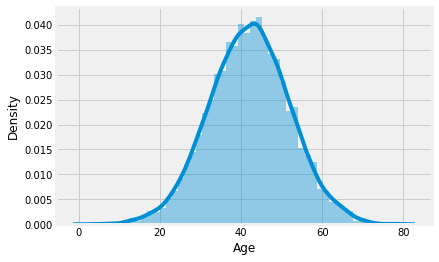

In [23]:
sns.distplot(hr['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



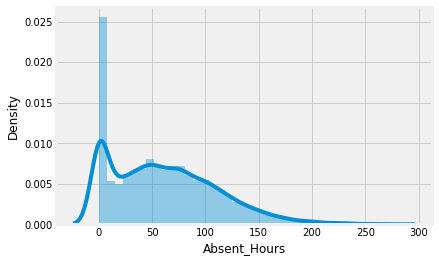

In [25]:
# Cek distribusi of Absent
sns.distplot(hr['Absent_Hours'])

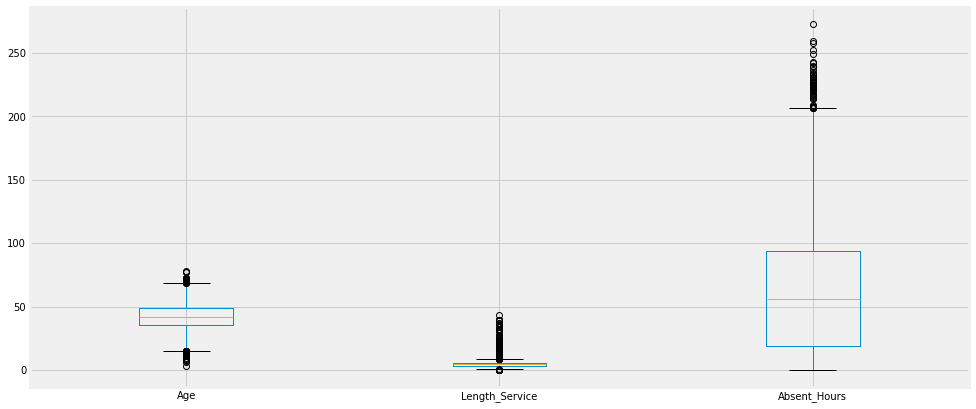

In [26]:
hr.boxplot(column  = ['Age', 'Length_Service', 'Absent_Hours'], figsize=(15, 7))

In [27]:
hr.corr()

,Age,Length_Service,Absent_Hours,distribution_centers_id,EmployeeNumber
Age,1.000000,0.068799,0.827706,-0.016960,-0.023288
Length_Service,0.068799,1.000000,-0.044078,-0.014358,-0.140571
Absent_Hours,0.827706,-0.044078,1.000000,-0.011445,0.007572
distribution_centers_id,-0.016960,-0.014358,-0.011445,1.000000,-0.001312
EmployeeNumber,-0.023288,-0.140571,0.007572,-0.001312,1.000000


- *Correlation Plot*

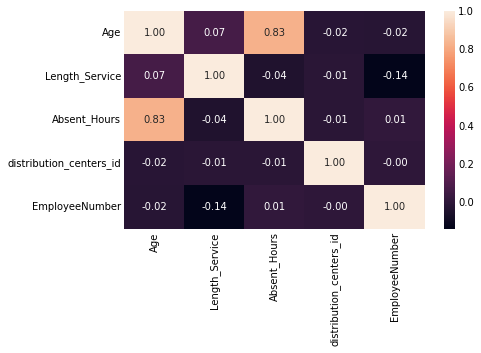

In [28]:
sns.heatmap(hr.corr(), annot=True, fmt=".2f")
plt.show()

**Insight:**

Yes, ternyata bahwa **Age** memiliki corelasi yang cukup kuat terhadap **AbsentHours**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



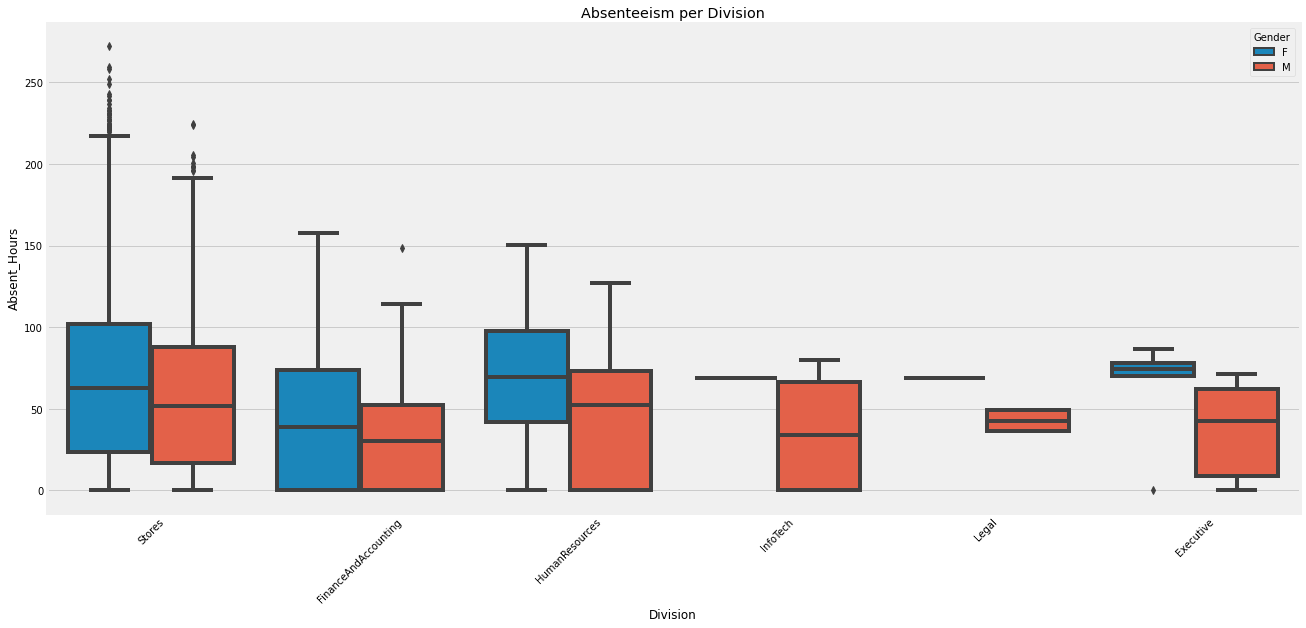

In [31]:
# Average Absenteeism per Division

plt.figure(figsize=(20, 9))
sns.boxplot("Division", "Absent_Hours", hue="Gender", data=hr)
plt.xticks(rotation = 45)
plt.title('Absenteeism per Division');

**Insight:**

Ya, ada beberapa perbedaan absensi per divisi, lokasi dan departemen

[Text(0, 0, 'F'), Text(0, 0, 'M')]

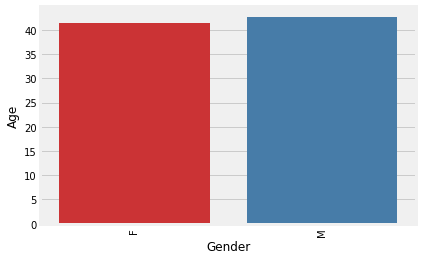

In [32]:
# Are older employees sick more often?
performance_chart = sns.barplot(x = 'Gender', y = 'Age', data=hr, palette='Set1', ci=None)
performance_chart.set_xticklabels(performance_chart.get_xticklabels(),rotation=90)

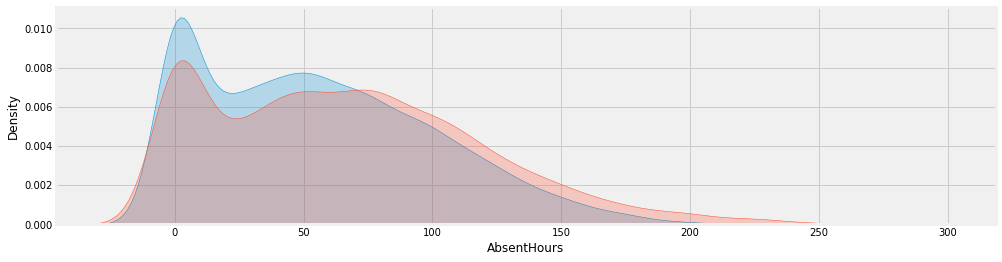

In [33]:
# Apakah ada perbedaan antara pria dan wanita?
plt.figure(figsize=(15,4))
sns.kdeplot(hr.Absent_Hours[hr.Gender=='M'], label='men', shade=True)
sns.kdeplot(hr.Absent_Hours[hr.Gender=='F'], label='women', shade=True)
plt.xlabel('AbsentHours');

In [35]:
average_male = hr.Absent_Hours[hr.Gender == 'M'].mean()
average_female = hr.Absent_Hours[hr.Gender == 'F'].mean()
print('Mean of absenthours for male: ', average_male)
print('Mean of absenthours for female: ', average_female)

Mean of absenthours for male:  55.9562316669393
Mean of absenthours for female:  66.72408115327302


**Insight**

Laki-laki rata-rata 10,77 jam lebih sedikit absen dibandingkan perempuan.

(array([   6.,   84.,  338., 1145., 2161., 2396., 1540.,  556.,  147.,
          11.]),
 array([ 3.5047425 , 10.94806856, 18.39139461, 25.83472066, 33.27804671,
        40.72137276, 48.16469881, 55.60802487, 63.05135092, 70.49467697,
        77.93800302]),
 <a list of 10 Patch objects>)

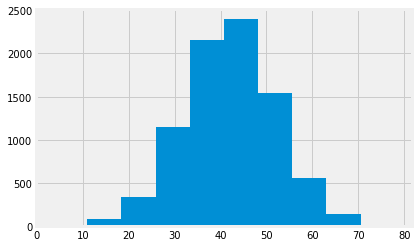

In [36]:
plt.hist(hr['Age'])

**Insight**

Rata-rata umur tidak jauh berbeda

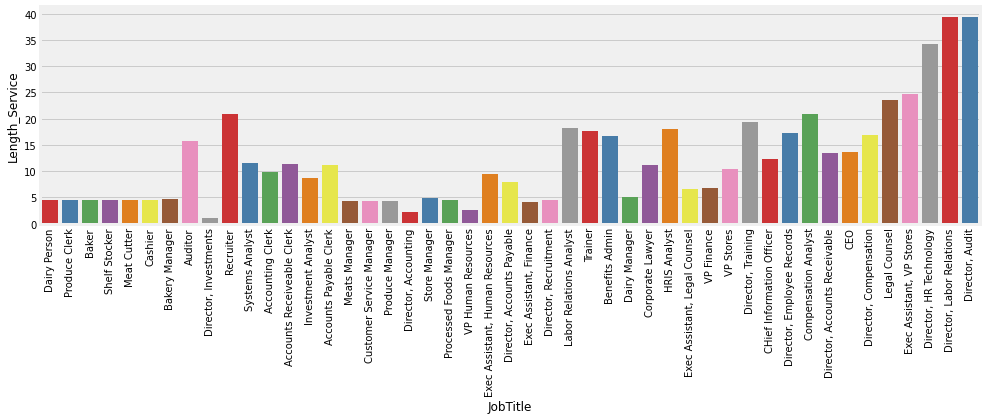

In [37]:
plt.figure(figsize=(15, 4))
hr = hr.sort_values(['Length_Service']).reset_index(drop=True)
position_chart = sns.barplot(x = 'JobTitle', y = 'Length_Service', data=hr, palette='Set1', ci = None)
position_chart.set_xticklabels(position_chart.get_xticklabels(),rotation=90)
plt.show()

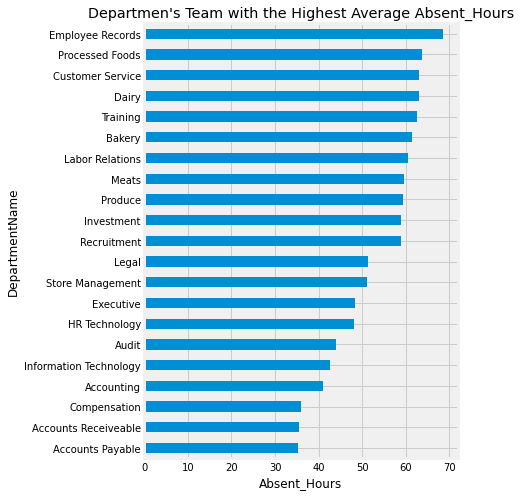

In [39]:
plt.figure(figsize=(5, 8))
df = hr.replace(np.nan,0)
df = hr.groupby(['DepartmentName'])['Absent_Hours'].mean()
df = df.sort_values(axis=0)

xlabel = 'Absent_Hours'
ylabel = 'DepartmentName'
title= "Departmen's Team with the Highest Average Absent_Hours"

ax = df.plot.barh(stacked = True)
ax.set(title = title, xlabel=xlabel, ylabel=ylabel)
plt.show()

**Insight:**

Ternyata, setelah di sort departemn **procesed foods** yang memiliki Absen paling bayak. Kemudian disusul dengan departemn **Custemer Service** dan **Dairy**

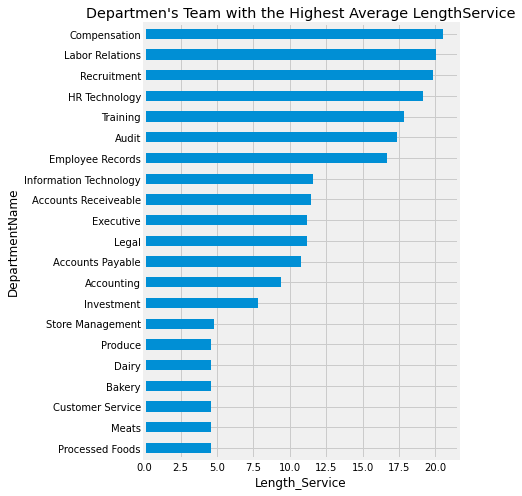

In [40]:
plt.figure(figsize=(5, 8))
df = hr.replace(np.nan,0)
df = hr.groupby(['DepartmentName'])['Length_Service'].mean()
df = df.sort_values(axis=0)

xlabel = 'Length_Service'
ylabel = 'DepartmentName'
title= "Departmen's Team with the Highest Average LengthService"

ax = df.plot.barh(stacked = True)
ax.set(title = title, xlabel=xlabel, ylabel=ylabel)
plt.show()

**Insight:**

Ternyata, setelah di sort departemn **Compesatione** yang memiliki lengthServive paling bayak. Kemudian disusul dengan departemn **Labor Relatio** dan **Recruitment**

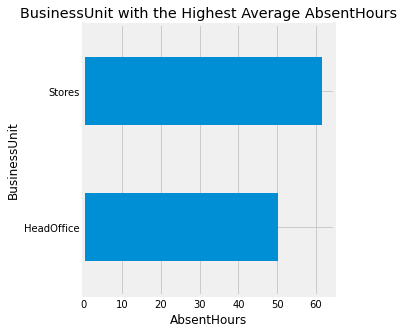

In [41]:
plt.figure(figsize=(4, 5))
df = hr.replace(np.nan,0)
df = hr.groupby(['BusinessUnit'])['Absent_Hours'].mean()
df = df.sort_values(axis=0)

xlabel = 'AbsentHours'
ylabel = 'BusinessUnit'
title= "BusinessUnit with the Highest Average AbsentHours"

ax = df.plot.barh(stacked = True)
ax.set(title = title, xlabel=xlabel, ylabel=ylabel)
plt.show()

In [42]:
hr[categorical_features].head()

,Fisrt_Name,Last_Name,Gender,JobTitle,DepartmentName,Division,BusinessUnit
0,Sanford,Melvin,M,Dairy Person,Dairy,Stores,Stores
1,Larson,Eddie,M,Produce Clerk,Produce,Stores,Stores
2,Eastman,Dorian,M,Baker,Bakery,Stores,Stores
3,Thigpen,Adam,M,Produce Clerk,Produce,Stores,Stores
4,Martindale,Nancy,F,Shelf Stocker,Processed Foods,Stores,Stores


- *Number of Unique Values

In [43]:
for feature in categorical_features:
    print(hr[feature].value_counts())

Johnson      106
Smith         86
Williams      72
Jones         71
Brown         62
            ... 
Thorne         1
Defreitas      1
Lacombe        1
Chaffin        1
Buswell        1
Name: Fisrt_Name, Length: 4051, dtype: int64
James        184
John         161
Robert       136
Mary         124
William      123
            ... 
Florencia      1
Dorla          1
Mechelle       1
Melony         1
Brandi         1
Name: Last_Name, Length: 1625, dtype: int64
M    4234
F    4150
Name: Gender, dtype: int64
Cashier                            1703
Dairy Person                       1514
Meat Cutter                        1480
Baker                              1404
Produce Clerk                      1129
Shelf Stocker                       712
Bakery Manager                       45
Store Manager                        39
Meats Manager                        34
Processed Foods Manager              34
Produce Manager                      34
Customer Service Manager             34
Trainer   

In [44]:
hr[categorical_features].nunique()

Fisrt_Name        4051
Last_Name         1625
Gender               2
JobTitle            47
DepartmentName      21
Division             6
BusinessUnit         2
dtype: int64

In [45]:
hr[numerical_features].nunique()

Age                        8298
Length_Service             8301
Absent_Hours               7016
distribution_centers_id      10
EmployeeNumber             8336
dtype: int64

- *Count of Unique Values*

In [46]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
employee_labels = gle.fit_transform(hr['Gender'])
current_employee = {index: label for index, label in 
                  enumerate(gle.classes_)}

### Target Engineering

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67b2c2ddd0>,
      dtype=object)

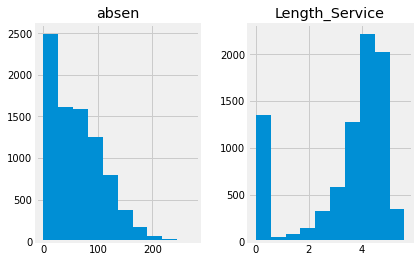

In [47]:
absen = pd.DataFrame({'absen': hr['Absent_Hours'], 'Length_Service': np.log1p(hr['Absent_Hours'])})
absen.hist()

- dengan mengunkan Log1p merubah distribusinya dari **skewed right menjadi skewed Left**

In [48]:
# One hot encode
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(hr)

OneHotEncoder(handle_unknown='ignore')

In [49]:
hr['Absent_Hours'] = np.log1p(hr['Absent_Hours'])


In [50]:
hr['Absent_Hours']

0       0.000000
1       4.144646
2       4.982172
3       4.157537
4       4.441366
          ...   
8379    0.000000
8380    3.975128
8381    0.000000
8382    3.471581
8383    0.000000
Name: Absent_Hours, Length: 8384, dtype: float64

### Modeling

In [51]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
df = df.sample(frac = 0.75)

In [54]:
X = pd.DataFrame({'EmployeeNumber':hr['EmployeeNumber'],'Age':hr['Age'].round(2)})
#X = np.append(X,np.zeros([len(X),0]),1)    #pd.Series([0 for x in range(len(X.index))], index=X.index)
# X = X.reshape(X.shape[1:])
y = hr['Absent_Hours']  #.apply(np.log1p).round(2)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)
X_train, y_train, X_test, y_test

(      EmployeeNumber    Age
 4941            2356  38.11
 2415            7226  33.10
 8009            6103  22.22
 7597            1106  42.38
 279             3160  30.46
 ...              ...    ...
 7382            3475  44.80
 7763             286  45.09
 5218            2558  35.36
 1346            7720  47.59
 3582            1102  45.03
 
 [5868 rows x 2 columns], 4941    2.409697
 2415    4.276042
 8009    0.000000
 7597    3.744797
 279     2.823637
           ...   
 7382    4.426612
 7763    4.331804
 5218    3.496976
 1346    4.588959
 3582    4.206289
 Name: Absent_Hours, Length: 5868, dtype: float64,       EmployeeNumber    Age
 5599            5357  28.28
 3293            8203  28.39
 5569            7895  50.43
 3721            5623  55.92
 2430            5218  37.12
 ...              ...    ...
 7194            3718  33.62
 554             3259  43.48
 8182            1780  44.10
 5656            3210  46.44
 6146            4934  57.14
 
 [2516 rows x 2 columns], 5

In [58]:
regr = linear_model.LinearRegression()

In [59]:
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients: 
 [1.61662449e-05 1.26226211e-01]
Mean squared error: 1.17
Coefficient of determination: 0.56


- **Cross Validation**

In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr,X,y,cv=10)

In [61]:
scores.mean(), scores.std()

(0.56872326577179, 0.08040085087248526)

- **Mengulangi hal yang sama, tetapi dengan lebih banyak fitur**

In [64]:
X_2 = pd.DataFrame({'EmployeeNumber':hr['EmployeeNumber'],
                  'Age':hr['Age'].round(2), 
                  'Length_Service':hr['Length_Service'],
                  'Gender':hr['Gender']})

y_2 = hr['Absent_Hours']  #.apply(np.log1p).round(2)

In [66]:
# Transform Male/Females to 1/0's

X_2['Gender'] = X_2['Gender'].replace({'M':1,'F':2})
X_2['Gender']

0       1
1       1
2       1
3       1
4       2
       ..
8379    1
8380    1
8381    1
8382    1
8383    2
Name: Gender, Length: 8384, dtype: int64

In [67]:
scores_2 = cross_val_score(regr,X_2,y_2,cv=10)
scores_2.mean(), scores_2.std()

(0.5796271719941645, 0.08033479786596806)

- Model kami sedikit meningkat (MSE lebih rendah dan akurasi lebih tinggi) dengan menambahkan Durasi Layanan dan Jenis Kelamin, tetapi standar deviasi kami juga sedikit lebih tinggi

- Mencoba dengan boosting

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=0)
gb_reg.fit(X_train,y_train)
y_pred = gb_reg.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_pred, y_test))

# Koefisien determinasi: 1 adalah prediksi sempurna
print('Coefficient of determination: %.2f'
      % r2_score(y_pred, y_test))

gb_reg.score(X_test, y_test)

Mean squared error: 0.99
Coefficient of determination: 0.44


0.6326851846516977

In [69]:
scores_3 = cross_val_score(gb_reg,X_2,y_2,cv=10)
scores_3.mean(), scores_3.std()

(0.6577442498095347, 0.07558533324774201)

- Sekali lagi, skor kami meningkat. Masih banyak pekerjaan yang harus dilakukan (Satu Hot Encoding BU, Divisi, Departemen) untuk mencoba dan meningkatkan model, tetapi menggunakan GradientBoostingRegressor tampaknya sangat cocok!

- Kemudian melakukan modeling dari berbagai model Regresor

In [70]:
# Quick death match between a bunge of regressors
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
# Quick death match between a bunge of regressors
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet, Lars
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

regressors = [DecisionTreeRegressor(), ExtraTreeRegressor(), #LogisticRegression(),
AdaBoostRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(), RandomForestRegressor(),
Ridge(), Lasso(), LinearRegression(), ElasticNet(), Lars()]

log_cols=["regressors", "MSE"]
log = pd.DataFrame(columns=log_cols)

for rgr in regressors:
    rgr.fit(X_train, y_train)
    name = rgr.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = rgr.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, train_predictions))
    print("RMSE: {}".format(mse))
    
    
    log_entry = pd.DataFrame([[name, mse]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

DecisionTreeRegressor
****Results****
RMSE: 1.382046969814501
ExtraTreeRegressor
****Results****
RMSE: 1.3874494679278897
AdaBoostRegressor
****Results****
RMSE: 1.0751786219574702
GradientBoostingRegressor
****Results****
RMSE: 0.9928388587334928
ExtraTreesRegressor
****Results****
RMSE: 1.0962585489499774
RandomForestRegressor
****Results****
RMSE: 1.0655029415086879
Ridge
****Results****
RMSE: 1.0830447996791397
Lasso
****Results****
RMSE: 1.0880296034265053
LinearRegression
****Results****
RMSE: 1.0830447836378794
ElasticNet
****Results****
RMSE: 1.0847943866228684
Lars
****Results****
RMSE: 1.0830447836378794


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





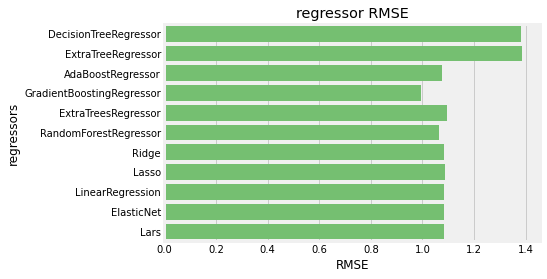

In [71]:
sns.set_color_codes("muted")
sns.barplot(x='MSE', y='regressors', data=log, color="g")

plt.xlabel('RMSE')
plt.title('regressor RMSE')
plt.show()

 - Berdasarkan gambar diatas menunjukan kesalahan perediksi moedel
 - Nilai yang paling rendah menunjukan model yang paling baik diantaranya model GradientBoostingRegressor paling baik

- Kemudian mencoba empat model yang paling baik,  GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor()

In [72]:
gb = GradientBoostingRegressor()
ad = AdaBoostRegressor()
et = ExtraTreesRegressor()
rf = RandomForestRegressor()

gb.fit(X_train, y_train)
gb_preds_train = gb.predict(X_train)
gb_preds_test = gb.predict(X_test)

ad.fit(X_train, y_train)
ad_preds_train = ad.predict(X_train)
ad_preds_test = ad.predict(X_test)

et.fit(X_train, y_train)
et_preds_train = et.predict(X_train)
et_preds_test = et.predict(X_test)

rf.fit(X_train, y_train)
rf_preds_train = rf.predict(X_train)
rf_preds_test = rf.predict(X_test)

In [73]:
base_predictions_train = pd.DataFrame( {'GradientBoost': gb_preds_train.ravel(),
                                        'AdaBoost': ad_preds_train.ravel(),
                                        'ExtraTrees': et_preds_train.ravel(),
                                        'RandForest': rf_preds_train.ravel()
    })

base_predictions_test = pd.DataFrame( {'GradientBoost': gb_preds_test.ravel(),
                                        'AdaBoost': ad_preds_test.ravel(),
                                        'ExtraTrees': et_preds_test.ravel(),
                                        'RandForest': rf_preds_test.ravel()
    })
y_train, y_test = y_train.ravel(), y_test.ravel()
base_predictions_train.head()

,GradientBoost,AdaBoost,ExtraTrees,RandForest
0,3.253826,2.422015,2.409697,2.426615
1,2.039997,1.765226,4.276042,3.423552
2,0.134575,0.195285,0.000000,0.000000
3,3.974321,3.489117,3.744797,3.790687
4,1.902318,1.762230,2.823637,2.748260


- Kerangka data di atas digunakan untuk melatih regressor bertumpuk seperti XGBoost. Akan tetapi hasil belum memuaskan.
- Kesimpulannya model yang saya  gunakan mengunakan model GBR

- Kemudian melakukan hyper parameter GradientBoostingRegressor dimana GBR memiliki nilai RMSE paling baik


### Evaluasi

In [74]:
# Tune hyper parameters
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'alpha': [0.1, 0.5, 0.9],
                     'learning_rate': [0.001, 0.01, 0.1, 1],
                     'n_estimators': [50, 100, 150]}]
                     #'kernel': ['rbf']}]

scores = ['neg_mean_squared_error', 'r2']

for score in scores:
    print(score)
    regr = GridSearchCV(GradientBoostingRegressor(), tuned_parameters, cv=5, verbose=1, n_jobs=-1,
                       scoring='%s' % score)
    regr.fit(X_train, y_train)
    print(regr.best_params_)

    # Not useful every time:
    means = regr.cv_results_['mean_test_score']
    stds = regr.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, regr.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

neg_mean_squared_error
Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'alpha': 0.1, 'learning_rate': 0.1, 'n_estimators': 50}
-2.635 (+/-0.154) for {'alpha': 0.1, 'learning_rate': 0.001, 'n_estimators': 50}
-2.479 (+/-0.145) for {'alpha': 0.1, 'learning_rate': 0.001, 'n_estimators': 100}
-2.338 (+/-0.136) for {'alpha': 0.1, 'learning_rate': 0.001, 'n_estimators': 150}
-1.657 (+/-0.085) for {'alpha': 0.1, 'learning_rate': 0.01, 'n_estimators': 50}
-1.232 (+/-0.055) for {'alpha': 0.1, 'learning_rate': 0.01, 'n_estimators': 100}
-1.075 (+/-0.056) for {'alpha': 0.1, 'learning_rate': 0.01, 'n_estimators': 150}
-0.986 (+/-0.087) for {'alpha': 0.1, 'learning_rate': 0.1, 'n_estimators': 50}
-0.999 (+/-0.092) for {'alpha': 0.1, 'learning_rate': 0.1, 'n_estimators': 100}
-1.009 (+/-0.091) for {'alpha': 0.1, 'learning_rate': 0.1, 'n_estimators': 150}
-1.291 (+/-0.137) for {'alpha': 0.1, 'learning_rate': 1, 'n_estimators': 50}
-1.456 (+/-0.156) for {'alpha': 0.1, 'learning_rate': 1

In [75]:
# Mengembalikan koefisien determinasi R^2 dari prediksi.
regr.score(X_test, y_test)


0.6350808185957433

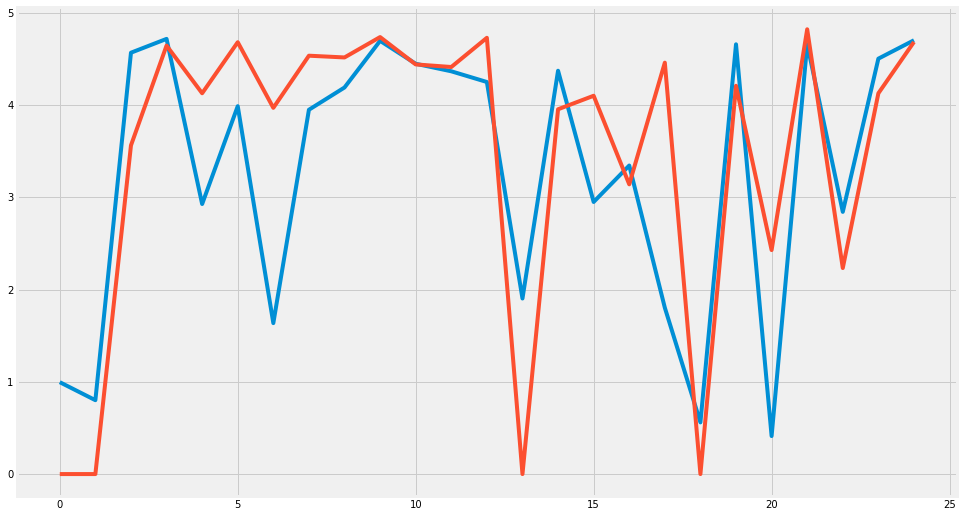

In [76]:
yhat = regr.predict(X_test)

plt.figure(figsize=(15,9))
plt.plot(yhat[:25])
plt.plot(y_test[:25])

### Kesimpulan akhir

- Ini umumnya merupakan bagaimana beberapa prestasi berhubungan dengan ketidakhadiran. Saya melihat bahwa wanita cenderung memiliki lebih banyak waktu absen dan juga usia merupakan ukuran penting untuk itu. Disini menggunkan regressor dengan R^2 

[Data Source rujukan](https://www.kaggle.com/datasets/HRAnalyticRepository/absenteeism-dataset)